In [14]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm
import re
from nycc_src.employer import employer as emp
fp = '/home/chansoo/data/nyc_contributions/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
%%time
candidates = ['McGuire, Raymond J', 'Yang, Andrew', 'Adams, Eric L',
    'Garcia, Kathryn A', 'Wiley, Maya D', 'Morales, Dianne',
    'Donovan, Shaun', 'Stringer, Scott M']

iter_csv = pd.read_csv(f"{fp}/contributions.csv", iterator=True, chunksize=10000)
df = pd.concat(
    [
        chunk[chunk['ELECTION'].astype(str).str.contains('2021')] 
        for chunk in tqdm(iter_csv)
    ]
)

df['id'] = df.index
df = df.loc[df['OFFICECD'].isin(['1','11']) & df['CANDNAME'].isin(candidates)].copy()

130it [00:10, 12.47it/s]


CPU times: user 11.2 s, sys: 175 ms, total: 11.3 s
Wall time: 11.3 s


100%|██████████| 99/99 [00:00<00:00, 227.20it/s]


[{'bloomberg lp', 'bloomberg'}, {'nyc department of education', 'department of education', 'nyc dept of education'}, {'legal aid society', 'the legal aid society'}, {'nyc department of sanitation', 'nyc dept of sanitation'}]


<AxesSubplot:xlabel='CANDNAME', ylabel='EMPNAME'>

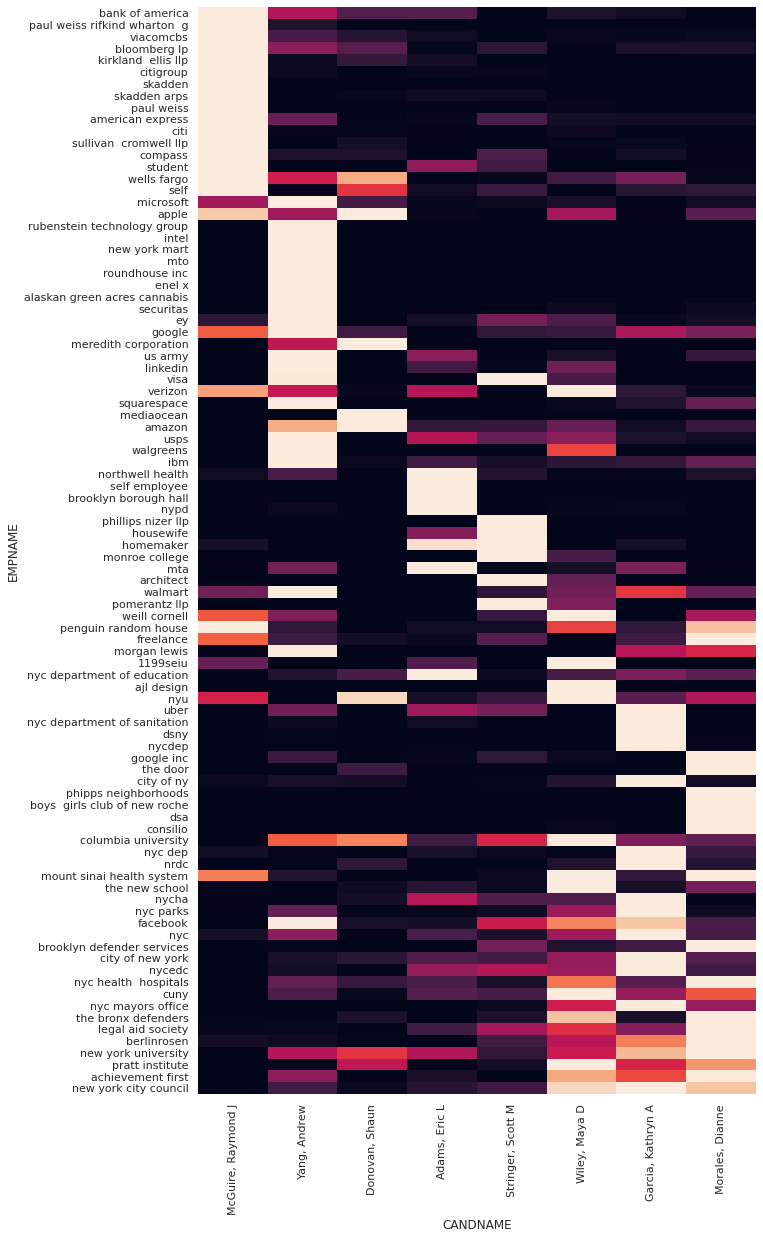

In [168]:
df['EMPNAME'] = emp.cleanname(df['EMPNAME'])
heatmap = emp.heatmap(df=df, value='AMNT')
heatmap.heatmap()

100%|██████████| 99/99 [00:00<00:00, 228.07it/s]


[{'bloomberg lp', 'bloomberg'}, {'nyc department of education', 'department of education', 'nyc dept of education'}, {'legal aid society', 'the legal aid society'}, {'nyc department of sanitation', 'nyc dept of sanitation'}]


<AxesSubplot:xlabel='CANDNAME', ylabel='EMPNAME'>

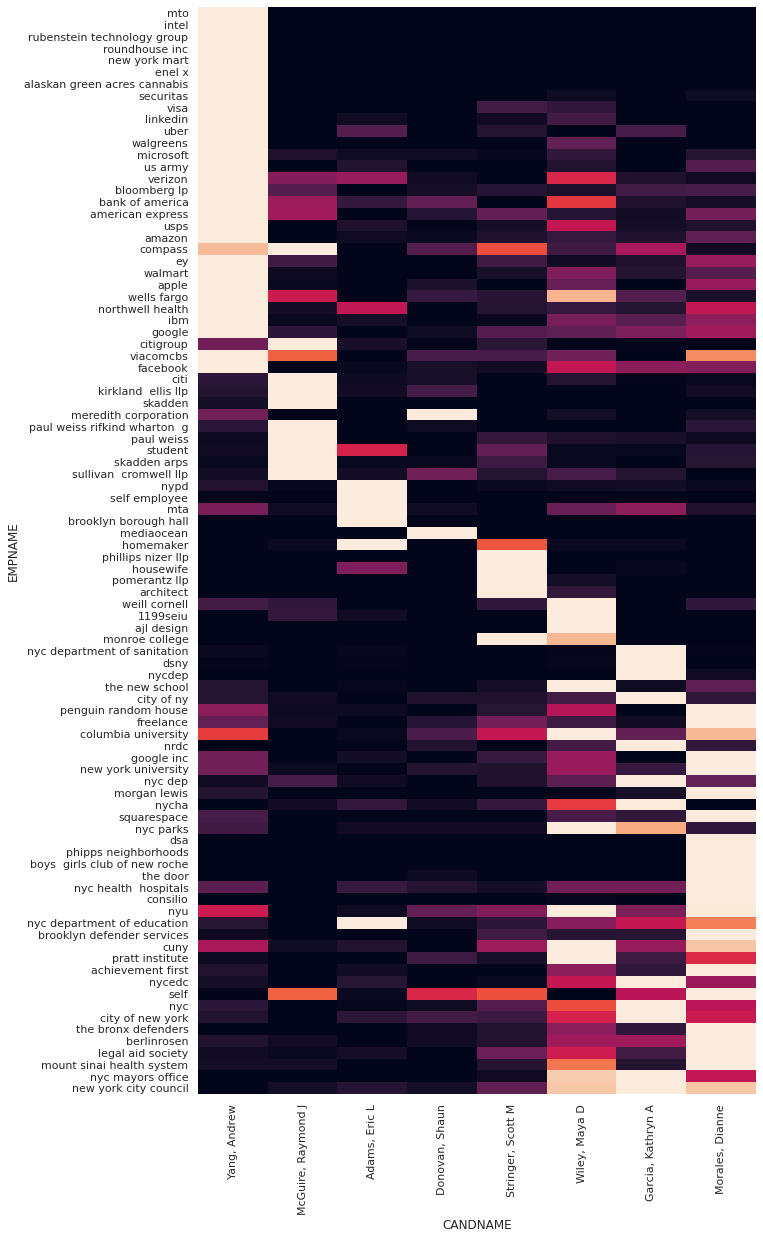

In [169]:
df['EMPNAME'] = emp.cleanname(df['EMPNAME'])
heatmap = emp.heatmap(df=df, value='count')
heatmap.heatmap()